<a href="https://colab.research.google.com/github/emaudealtema/Data-Mining/blob/main/Regroupement_dataset_iris_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, classification_report,davies_bouldin_score, pairwise_distances

In [2]:
#%matplotlib inline
#rcParams['figure.figsize'] = 7, 4

In [3]:
iris = datasets.load_iris()
x = scale(iris.data)
y = pd.DataFrame(iris.target)
variables_name = iris.feature_names
x[0:10,]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [4]:
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(iris.data)
df.head(10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
dataf = pd.DataFrame(iris.feature_names)
dataf

,0
0,sepal length (cm)
1,sepal width (cm)
2,petal length (cm)
3,petal width (cm)


##Construction et execussion du model

In [7]:
clustering = KMeans(n_clusters=3, random_state=5)
print(clustering.fit(x))

KMeans(n_clusters=3, random_state=5)


In [8]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_width']
y.columns = ['Targets']

iris_df       

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##Afficher les sorties de notre model

Text(0.5, 1.0, 'K-Means Classification')

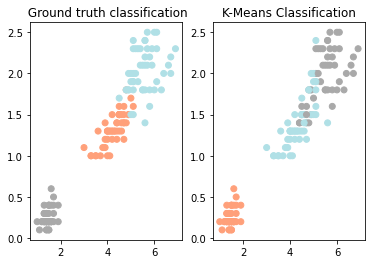

In [9]:

color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_width, c=color_theme[iris.target])
plt.title(" Ground truth classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_width, c=color_theme[clustering.labels_])
plt.title("K-Means Classification")

Text(0.5, 1.0, 'K-Means Classification')

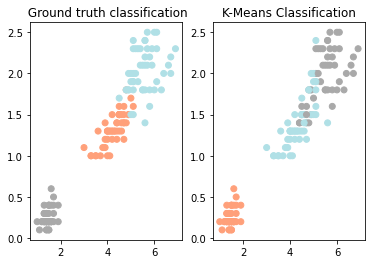

In [10]:
# Le model semble faire un bon trvail de regroupement maintenant essayons de labeliser les labels predits
relabel = np.choose(clustering.labels_,[2,0,1])
from typing import Any
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_width, c=color_theme[iris.target])
plt.title(" Ground truth classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_width, c=color_theme[clustering.labels_])
plt.title("K-Means Classification")


# Evaluation des résultats du  modèle
# Avec différentes métric de sklearn comme classification_report, Silhouette_score, calinski_harabasz
 
## Si les étiquettes de vérité terrain ne sont pas connues, l'évaluation doit être effectuée à l'aide du modèle lui-même. Le coefficient de silhouette (sklearn.metrics.silhouette_score) est un exemple d'une telle évaluation, où un score de coefficient de silhouette plus élevé se rapporte à un modèle avec des clusters mieux définis. Le Coefficient Silhouette est défini pour chaque échantillon et est composé de deux scores :

a : La distance moyenne entre un échantillon et tous les autres points de la même classe.

b : La distance moyenne entre un échantillon et tous les autres points de la grappe la plus proche.

Le coefficient de silhouette s pour un seul échantillon est alors donné par :

 
Le coefficient de silhouette pour un ensemble d'échantillons est donné comme la moyenne du coefficient de silhouette pour chaque échantillon.


---



In [11]:
from sklearn import metrics
labels = clustering.labels_
metrics.silhouette_score(x, labels, metric='euclidean')

0.45994823920518635

In [12]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



###Si les étiquettes de vérité de terrain ne sont pas connues, l'indice Calinski-Harabasz (sklearn.metrics.calinski_harabasz_score) - également connu sous le nom de critère du rapport de variance - peut être utilisé pour évaluer le modèle, où un score Calinski-Harabasz plus élevé se rapporte à un modèle avec clusters mieux définis.

###L'indice est le rapport de la somme de la dispersion inter-clusters et de la dispersion intra-cluster pour tous les clusters (où la dispersion est définie comme la somme des distances au carré) :

### En utilisation normale, l'indice Calinski-Harabasz est appliqué aux résultats d'une analyse de cluster.

## Indice Calinski-Harabasz
###Si les étiquettes de vérité de terrain ne sont pas connues, l'indice Calinski-Harabasz (sklearn.metrics.calinski_harabasz_score) - également connu sous le nom de critère du rapport de variance - peut être utilisé pour évaluer le modèle, où un score Calinski-Harabasz plus élevé se rapporte à un modèle avec clusters mieux définis.

###L'indice est le rapport de la somme de la dispersion inter-clusters et de la dispersion intra-cluster pour tous les clusters (où la dispersion est définie comme la somme des distances au carré).

##Avantages
###Le score est plus élevé lorsque les clusters sont denses et bien séparés, ce qui correspond à un concept standard de cluster.

###Le score est rapide à calculer

In [13]:
metrics.calinski_harabasz_score(x, labels)

241.90440170183157

## Davies_bouldin_scor, le meilleur metric de score pour la méthode K-Means
#####Si les étiquettes de vérité terrain ne sont pas connues, l'indice Davies-Bouldin (sklearn.metrics.davies_bouldin_score) peut être utilisé pour évaluer le modèle, où un indice Davies-Bouldin inférieur se rapporte à un modèle avec une meilleure séparation entre les clusters.

#####Cet indice signifie la « similarité » moyenne entre les clusters, où la similarité est une mesure qui compare la distance entre les clusters avec la taille des clusters eux-mêmes.

#####Zéro est le score le plus bas possible. Des valeurs plus proches de zéro indiquent une meilleure partition.


##Avantages¶
#####Le calcul de Davies-Bouldin est plus simple que celui des scores Silhouette.

#####L'indice est uniquement basé sur des quantités et des caractéristiques inhérentes à l'ensemble de données, car son calcul n'utilise que des distances ponctuelles.

##Désavantages
#####L'indice Davies-Boulding est généralement plus élevé pour les clusters convexes que pour les autres concepts de clusters, tels que les clusters basés sur la densité comme ceux obtenus à partir de DBSCAN.



In [14]:
davies_bouldin_score(x, labels)

0.8335949464754338

# Exercice # 3 #Model avec la méthode AffinityProgation

### Dans l'exploration de données et les statistiques, le clustering hiérarchique (également appelé analyse de cluster hiérarchique ou HCA) est une méthode d'analyse de cluster qui cherche à construire une hiérarchie de clusters. Les stratégies de clustering hiérarchique se divisent généralement en deux types :[1]

#### Agglomérative : il s'agit d'une approche "ascendante" : chaque observation commence dans son propre cluster, et les paires de clusters sont fusionnées au fur et à mesure que l'on monte dans la hiérarchie.
###Divisive: il s'agit d'une approche "descendante" : toutes les observations commencent dans un groupe et les divisions sont effectuées de manière récursive au fur et à mesure que l'on descend dans la hiérarchie.

####En général, les fusions et scissions sont déterminées de manière gloutonne. Les résultats du clustering hiérarchique [2] sont généralement présentés dans un dendrogramme.

#### L'algorithme standard pour le clustering agglomératif hiérarchique (HAC) a un temps de  complexité O(n^3) et nécessite de la mémoire Ω (n^2)  ce qui le rend trop lent même pour les ensembles de données moyens. Cependant, pour certains cas particuliers, des méthodes agglomératives efficaces optimales (de complexité O(n2) sont connus pour single-linkage et pour complete-linkage clustering. Avec un tas, le temps d'exécution du cas général peut être réduit à O (n^2logn) au prix d'une augmentation supplémentaire des besoins en mémoire. Dans de nombreux cas, les surcharges de mémoire de cette approche sont trop importantes pour la rendre pratiquement utilisable. À l'exception du cas particulier de la liaison simple, aucun des algorithmes (sauf la recherche exhaustive dans O ( 2^n )  peut être garanti pour trouver la solution optimale, mais il est courant d'utiliser des heuristiques plus rapides pour choisir d"autres méthodes, telles que k-means.



# Developpement du model et evaluation et comparaison des resultats

#compaison du resultat avec la classification de lalverite terrain

Text(0.5, 1.0, 'AgglomerativeClustering ')

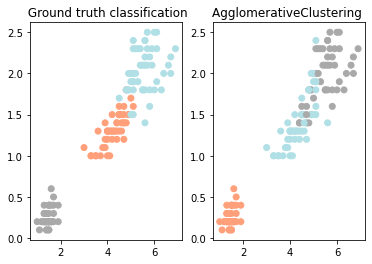

In [16]:
relabel = np.choose(labels,[2,0,1])
from typing import Any
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_width, c=color_theme[iris.target])
plt.title(" Ground truth classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_width, c=color_theme[labels])
plt.title("AgglomerativeClustering ")


#Application de quelques metric d'evaluation du modele

In [17]:
# Metric d'evaluation silhouette_score
from sklearn import metrics
labels = clustering.labels_
metrics.silhouette_score(x, labels, metric='euclidean')

0.45994823920518635

In [18]:
# Metric calinski_harabasz_score
metrics.calinski_harabasz_score(x, labels)

241.90440170183157